In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import numpy as np
import time

torch.manual_seed(1) # set the random seed

# obtain data
from torchvision import datasets, transforms
from torchvision import datasets, models, transforms
import torchvision.models

In [ ]:
#mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# unzip file
!unzip '/content/drive/My Drive/Colab Notebooks/APS360/new pokemon dataset.zip' -d '/root/dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /root/dataset/PokemonData/Golbat/7b7a064d3a1b4c53a9be936d4e4e3bab.jpg  
  inflating: /root/dataset/PokemonData/Golbat/7d07fd6776fb40e9986a1a0f62233325.jpg  
  inflating: /root/dataset/PokemonData/Golbat/815b279060b94e12a6b35d434a5250c2.jpg  
  inflating: /root/dataset/PokemonData/Golbat/818014085ff04885b31eb5e8737012f2.jpg  
  inflating: /root/dataset/PokemonData/Golbat/87529331a47b4a5cb5d10a6b3ea46d84.jpg  
  inflating: /root/dataset/PokemonData/Golbat/914fab74d32e49a98940d5ba7f674fa6.jpg  
  inflating: /root/dataset/PokemonData/Golbat/949a05bd0ad44be993e5fd89a8f582df.jpg  
  inflating: /root/dataset/PokemonData/Golbat/9a4c793b9b0042a99ebd540897f9f898.jpg  
  inflating: /root/dataset/PokemonData/Golbat/a35b4e8e603c485cb197520af30e1208.jpg  
  inflating: /root/dataset/PokemonData/Golbat/a45a14a67a7348bba57c06467bb73cde.jpg  
  inflating: /root/dataset/PokemonData/Golbat/acc2b44eada74a25a64c041b2e80c453.jpg  
  inflating: /

In [ ]:
#split the data into training validation and testing
!pip install split-folders
import split_folders
split_folders.ratio('/root/dataset/PokemonData', output='/root/dataset/PokemonData',seed=1337, ratio=(0.8, 0.1, 0.1))

Copying files: 6837 files [00:01, 3464.47 files/s]


Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


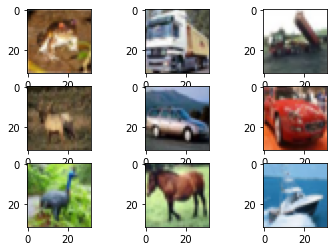

In [ ]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [ ]:
import os
classes=[]
for root, dirs, files in os.walk("/root/dataset/PokemonData/test"):
    for pokemon in dirs:
        classes.append(pokemon)
print(len(classes))
print(classes)
#classes.remove('dataset')
classes=sorted(classes)
print(len(classes))
print(classes)
data_dir = '/root/dataset/PokemonData'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')
test_dir = os.path.join(data_dir, 'test/')

150
['Vileplume', 'Charmander', 'Spearow', 'Dragonite', 'Seel', 'Rhyhorn', 'Bellsprout', 'Growlithe', 'Charizard', 'Horsea', 'Poliwhirl', 'Exeggcute', 'Muk', 'Nidoqueen', 'Koffing', 'Cloyster', 'Drowzee', 'Beedrill', 'Kangaskhan', 'Grimer', 'Jolteon', 'Magnemite', 'Marowak', 'Gastly', 'Rattata', 'Dragonair', 'Paras', 'Kabuto', 'Clefable', 'Magmar', 'Dodrio', 'Dewgong', 'Metapod', 'Raichu', 'Pikachu', 'Venomoth', 'Vaporeon', 'Staryu', 'Pidgeot', 'Geodude', 'Caterpie', 'Slowpoke', 'Arcanine', 'Gengar', 'Voltorb', 'Poliwrath', 'Starmie', 'Golem', 'Diglett', 'Slowbro', 'Tangela', 'Doduo', 'Golbat', 'Kakuna', 'Machamp', 'Ninetales', 'Sandslash', 'Eevee', 'Lapras', 'Articuno', 'Onix', 'Primeape', 'Arbok', 'Haunter', 'Venusaur', 'Abra', 'Aerodactyl', 'Gloom', 'Jigglypuff', 'Tentacool', 'Pidgey', 'Omanyte', 'Pinsir', 'Blastoise', 'Goldeen', 'Sandshrew', 'Pidgeotto', 'Kingler', 'Alakazam', 'Bulbasaur', 'Dratini', 'Nidorina', 'Flareon', 'Seadra', 'Ivysaur', 'Seaking', 'Porygon', 'Mew', 'Fearow',

In [ ]:
from torchvision import datasets, models, transforms

# We transform them to Tensors of normalized range [-1, 1].
transform = transforms.Compose([ transforms.Resize((224,224)),
                                transforms.ToTensor()])
#transforms.Resize((224,224)),
       


#import training data and validation data 
train_data = datasets.ImageFolder(train_dir, transform=transform)
val_data = datasets.ImageFolder(val_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)



# checking data stat
print('num of train img', len(train_data))
print('num of val img', len(val_data))
print('num of test img', len(test_data))


num of train img 5391
num of val img 615
num of test img 814


200
23
31


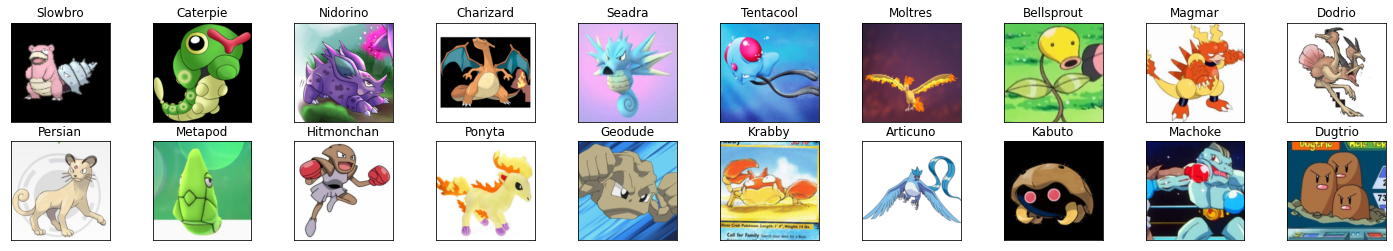

In [ ]:
# use dataloader
batch_size=27
num_workers=1
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                               num_workers=num_workers, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                               num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                               num_workers=num_workers, shuffle=True)


# maker sure the loaders are correct
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))



# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:
for imgs, labels in iter(train_loader): #iter is the key word for train loader
           
    #print(imgs)
    print(labels)
    print(imgs.shape)
    break

tensor([ 23,  89, 143,  59, 132,  67,  61, 136, 147,  97,  49, 138, 123,  73,
         88,  74,  80,  70,   9, 111,  60, 136,  96,  81,  83,  13,  80])
torch.Size([27, 3, 224, 224])


In [ ]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
#Convolutional Neural Network Architecture
class PokemonClassifier(nn.Module):
    def __init__(self):
        super(PokemonClassifier, self).__init__()
        self.name = "PokemonClassifier"
        self.conv1 = nn.Conv2d(3, 5, 4) #in_channels, out_chanels, kernel_size
        self.pool1 = nn.MaxPool2d(4, 4) #kernel_size, stride 
        self.conv2 = nn.Conv2d(5, 9, 6) #in_channels, out_chanels, kernel_size
        self.fc1 = nn.Linear(1296, 640)
        self.fc2 = nn.Linear(640, 149)
        self.printed = True
        self.count = 0

    def forward(self, x):
        self.count += 1
        # x.squeeze()
        if self.printed: print(x.shape)
        x = self.pool1(F.relu(self.conv1(x)))
        if self.printed: print(x.shape)
        x = self.pool1(F.relu(self.conv2(x)))
        if self.printed: print(x.shape)
        x = x.view(-1, 1296)
        if self.printed: print(x.shape)
        x = F.relu(self.fc1(x))
        if self.printed: print(x.shape)
        x = self.fc2(x)
        if self.printed: print(x.shape)
        self.printed = False
        return x


In [ ]:
def get_accuracy(model, data_loader):
    correct = 0
    total = 0
    for imgs, labels in data_loader:

      #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        #imgs = torch.tensor(resize(imgs.numpy, (3,224,224), anti_aliasing=True))

        output = model(imgs)
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total
  
print ('done')

done


In [ ]:
def train_net(model, train_data, val_data, batch_size=27, learning_rate=0.001, num_epochs=30):
    
    ########################################################################
    # Fixed PyTorch random seed for reproducible result

    torch.manual_seed(1000)

    num_workers=1
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                               num_workers=num_workers, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                               num_workers=num_workers, shuffle=True)
    
    ########################################################################
    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    iters, losses, train_acc, val_acc = [], [], [], []
    
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.

    print ("Training Started...")

    n = 0
    start_time=time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        
        for imgs, labels in iter(train_loader): #iter is the key word for train loader
           
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
            #imgs = resize(imgs, (3,224,224), anti_aliasing=True)

            out = model(imgs)             # forward pass
            
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
            
            n += 1
            
        # track accuracy
        iters.append(n)
        losses.append(float(loss)/batch_size)
        train_acc.append(get_accuracy(model, train_loader))
        val_acc.append(get_accuracy(model, val_loader))
        print(epoch, train_acc[-1], val_acc[-1])

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        # plotting
    end_time=time.time()
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()
  

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print('total time:',end_time-start_time,'seconds')
    
    return train_acc, val_acc
print('done')

done


CUDA is not available.  Training on CPU ...
Training Started...
torch.Size([27, 3, 224, 224])
torch.Size([27, 5, 55, 55])
torch.Size([27, 9, 12, 12])
torch.Size([27, 1296])
torch.Size([27, 640])
torch.Size([27, 149])
0 0.16598360655737704 0.08771929824561403
1 0.2336065573770492 0.15789473684210525
2 0.2069672131147541 0.15789473684210525
3 0.4036885245901639 0.21052631578947367
4 0.375 0.3157894736842105
5 0.5163934426229508 0.3508771929824561
6 0.4651639344262295 0.3333333333333333
7 0.4959016393442623 0.40350877192982454
8 0.555327868852459 0.3508771929824561
9 0.6762295081967213 0.45614035087719296
10 0.7315573770491803 0.42105263157894735
11 0.7991803278688525 0.5087719298245614
12 0.8135245901639344 0.43859649122807015
13 0.8381147540983607 0.543859649122807
14 0.8975409836065574 0.5087719298245614
15 0.9118852459016393 0.5789473684210527
16 0.9200819672131147 0.49122807017543857
17 0.9487704918032787 0.5087719298245614
18 0.9651639344262295 0.543859649122807
19 0.993852459016393

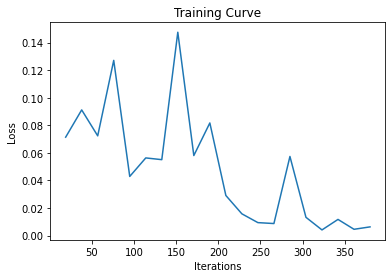

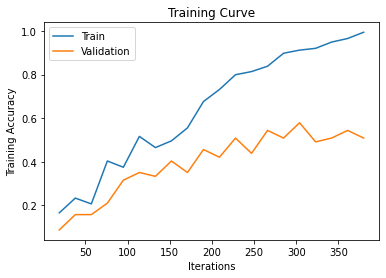

Final Training Accuracy: 0.9938524590163934
Final Validation Accuracy: 0.5087719298245614
total time: 325.5142583847046 seconds


([0.16598360655737704,
  0.2336065573770492,
  0.2069672131147541,
  0.4036885245901639,
  0.375,
  0.5163934426229508,
  0.4651639344262295,
  0.4959016393442623,
  0.555327868852459,
  0.6762295081967213,
  0.7315573770491803,
  0.7991803278688525,
  0.8135245901639344,
  0.8381147540983607,
  0.8975409836065574,
  0.9118852459016393,
  0.9200819672131147,
  0.9487704918032787,
  0.9651639344262295,
  0.9938524590163934],
 [0.08771929824561403,
  0.15789473684210525,
  0.15789473684210525,
  0.21052631578947367,
  0.3157894736842105,
  0.3508771929824561,
  0.3333333333333333,
  0.40350877192982454,
  0.3508771929824561,
  0.45614035087719296,
  0.42105263157894735,
  0.5087719298245614,
  0.43859649122807015,
  0.543859649122807,
  0.5087719298245614,
  0.5789473684210527,
  0.49122807017543857,
  0.5087719298245614,
  0.543859649122807,
  0.5087719298245614])

In [ ]:
# sample pokemon
use_cuda = True
model=PokemonClassifier()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, val_data,batch_size=27, num_epochs=20,learning_rate=0.001)

CUDA is available!  Training on GPU ...
Training Started...
torch.Size([27, 3, 224, 224])
torch.Size([27, 5, 55, 55])
torch.Size([27, 9, 12, 12])
torch.Size([27, 1296])
torch.Size([27, 640])
torch.Size([27, 149])


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


0 0.06007796376977757 0.0611439842209073


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


1 0.12886952533822518 0.10848126232741617


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2 0.23939463425819765 0.17751479289940827


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


3 0.38133455629442786 0.2564102564102564


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4 0.4948406328823664 0.2958579881656805


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5 0.6294427883512955 0.32938856015779094


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


6 0.6565008025682183 0.3037475345167653


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


7 0.8094473744554002 0.32938856015779094


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


8 0.8592066039899106 0.3214990138067061


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9 0.9055262554459986 0.3136094674556213


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


10 0.9456546663609264 0.3254437869822485


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


11 0.9692731024994268 0.33136094674556216


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


12 0.9878468241229076 0.3234714003944773


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


13 0.9862416876863105 0.34911242603550297


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14 0.9892226553542766 0.32741617357001973


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


15 0.9818848887869754 0.32741617357001973


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


16 0.9862416876863105 0.3214990138067061


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


17 0.9910570969961018 0.3333333333333333


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


18 0.9761522586562715 0.3155818540433925


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


19 0.9795918367346939 0.31952662721893493


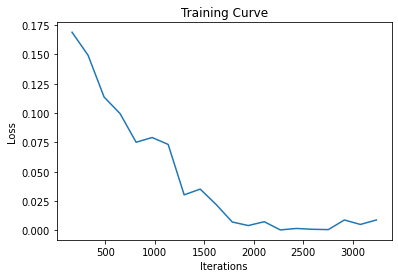

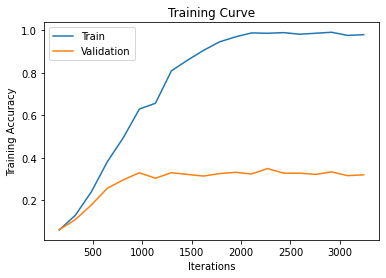

Final Training Accuracy: 0.9795918367346939
Final Validation Accuracy: 0.31952662721893493
total time: 2417.336290359497 seconds


([0.06007796376977757,
  0.12886952533822518,
  0.23939463425819765,
  0.38133455629442786,
  0.4948406328823664,
  0.6294427883512955,
  0.6565008025682183,
  0.8094473744554002,
  0.8592066039899106,
  0.9055262554459986,
  0.9456546663609264,
  0.9692731024994268,
  0.9878468241229076,
  0.9862416876863105,
  0.9892226553542766,
  0.9818848887869754,
  0.9862416876863105,
  0.9910570969961018,
  0.9761522586562715,
  0.9795918367346939],
 [0.0611439842209073,
  0.10848126232741617,
  0.17751479289940827,
  0.2564102564102564,
  0.2958579881656805,
  0.32938856015779094,
  0.3037475345167653,
  0.32938856015779094,
  0.3214990138067061,
  0.3136094674556213,
  0.3254437869822485,
  0.33136094674556216,
  0.3234714003944773,
  0.34911242603550297,
  0.32741617357001973,
  0.32741617357001973,
  0.3214990138067061,
  0.3333333333333333,
  0.3155818540433925,
  0.31952662721893493])

In [ ]:
# final state pokemon
use_cuda = True
model=PokemonClassifier()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_net(model, train_data, val_data,batch_size=27, num_epochs=20,learning_rate=0.001)

In [ ]:
import torchvision.models

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

In [ ]:
#features = alexnet.features(img)

In [ ]:
dataiter=iter(train_loader)
images, labels=dataiter.next()
features = alexnet.features(images)
features.shape

torch.Size([27, 256, 6, 6])

In [ ]:
# folder_name = master_path1 + '/' + str(classes[label])
# print(folder_name)
#   if not os.path.isdir(folder_name):
#     os.mkdir(folder_name)
#   torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')

for i in classes:
  torch.save(obj=None , f=master_path1+i)
  break

In [ ]:
# Save Features to Folder (assumes code from 1. has been evaluated)

import os
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

# location on Google Drive
master_path1 = '/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature'
master_path2 = '/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/ValFeature'
master_path3 = '/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TestFeature'
#test_dataset= datasets.ImageFolder(root = train_dir, transform=transform)
# Prepare Dataloader (requires code from 1.)
batch_size = 1 # save 1 file at a time, hence batch_size = 1
num_workers = 1
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
print(len(train_data_loader))
print(len(val_data_loader))
print(len(test_data_loader))


# save train features to folder as tensors
n = 0
for img, label in train_data_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = master_path1 + '/' + str(classes[label])
  print(folder_name)
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1
print('pass1')

# save validation features to folder as tensors
n = 0
for img, label in val_data_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = master_path2 + '/' + str(classes[label])
  print(folder_name)
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1
print('pass2')

# save test features to folder as tensors
n = 0
for img, label in test_data_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = master_path3 + '/' + str(classes[label])
  print(folder_name)
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1
print('pass3')

Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Wartortle
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Machamp
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Cloyster
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Nidoking
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Hitmonlee
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Ponyta
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Hitmonchan
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Victreebel
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Farfetchd
/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature/Tentacruel
/content/drive/My Drive/Colab Not

In [ ]:
master_path1 = '/content/drive/My Drive/Colab Notebooks/APS360/Project data/TrainFeatures'
master_path2 = '/content/drive/My Drive/Colab Notebooks/APS360/Project data/ValFeatures'
master_path3 = '/content/drive/My Drive/Colab Notebooks/APS360/Project data/TestFeatures'

In [ ]:
master_path1 = '/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TrainFeature'
master_path2 = '/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/ValFeature'
master_path3 = '/content/drive/My Drive/Colab Notebooks/APS360/NewProjectDataFeature/TestFeature'

In [ ]:
train_dataset = torchvision.datasets.DatasetFolder(master_path1, loader=torch.load, extensions=('.tensor'))
val_dataset = torchvision.datasets.DatasetFolder(master_path2, loader=torch.load, extensions=('.tensor'))
test_dataset = torchvision.datasets.DatasetFolder(master_path3, loader=torch.load, extensions=('.tensor'))

# Prepare Dataloader
batch_size = 32
num_workers = 1
train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

# Verification Step - obtain one batch of features
dataiter = iter(train_feature_loader)
features, labels = dataiter.next()
print(features.shape)
print(labels.shape)
print(len(train_feature_loader))
print(len(val_feature_loader))
print(len(test_feature_loader))

torch.Size([32, 256, 6, 6])
torch.Size([32])
169
20
26


In [ ]:
for img,labels in iter(train_feature_loader):
  print(img.shape)
  print(labels)
  break

torch.Size([32, 256, 6, 6])
tensor([  2, 129, 141, 126,  82,  49,  61,  96,  30, 132,  30, 124, 133,  24,
         53,  71,  43, 144,  55,  53,  29, 147, 113,  70, 145,  43, 139,  13,
         58, 127,  10,  38])


In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.name = "AlexNet"
        self.fc1 = nn.Linear(256 * 6 * 6, 500)
        self.fc2 = nn.Linear(500, 150)

    def forward(self, x):
        x = x.view(-1, 256 * 6 * 6) #flatten feature data
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def get_accuracyALEX(model, data_loader,train=False, softmx=False):
    
    correct = 0
    total = 0
    for imgs, labels in data_loader:
        
         
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
        
        output = model(imgs)

        ###### print softmax result (probability) for validation or test results at last epoch######
        if softmx and not(train):
          prob = F.softmax(output)
          for i in range(len(prob)):
            print('output: ', list(prob.max(1, keepdim=True)[1])[i], 'with a probability of', list(prob.max(1, keepdim=True)[0])[i])
         

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    

    return correct / total

In [ ]:
def train_netALEX(model, train_feature_loader, val_feature_loader, batch_size=32, learning_rate=0.001, num_epochs=30):
    
    ########################################################################
    # Fixed PyTorch random seed for reproducible result

    torch.manual_seed(1000)

    train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
    val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
    test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
    
    ########################################################################
    # Define the Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    iters, losses, train_acc, val_acc = [], [], [], []
    
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.

    print ("Training Started...")

    n = 0
    k=0
    start_time=time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        
        for imgs, labels in iter(train_feature_loader): #iter is the key word for train loader
           
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
            #imgs = resize(imgs, (3,224,224), anti_aliasing=True)

            out = model(imgs)             # forward pass
            
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
            
            n += 1
        # print softmax result at last epoch
        k+=1    
        if k==num_epochs:
          softmx=True
        else:
          softmx=False

        # track accuracy
        iters.append(n)
        losses.append(float(loss)/batch_size)
        train_acc.append(get_accuracyALEX(model,data_loader=train_feature_loader, train=True, softmx=softmx))
        val_acc.append(get_accuracyALEX(model, data_loader=val_feature_loader, train=False,softmx=softmx))
        print(epoch, train_acc[-1], val_acc[-1])

        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        # plotting
    end_time=time.time()
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()
  

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print('total time:',end_time-start_time,'seconds')
    
    return train_acc, val_acc
print('done')

done


CUDA is available!  Training on GPU ...
Training Started...
0 0.5265580736543909 0.42396777442094663
1 0.7066808309726157 0.4783484390735146
2 0.8332152974504249 0.5035246727089627
3 0.9120632672332389 0.5176233635448136
4 0.9558545797922569 0.5568982880161127
5 0.9648253068932956 0.5468277945619335
6 0.9628186968838527 0.5508559919436052
7 0.9792256846081209 0.56797583081571
8 0.9748583569405099 0.5619335347432024
9 0.9787535410764873 0.5639476334340383
10 0.9697828139754485 0.5508559919436052
11 0.9709631728045326 0.5206445115810675
12 0.9624645892351275 0.5297079556898288
13 0.9687204910292729 0.5427995971802618
14 0.9580972615675165 0.5146022155085599
15 0.9684844192634561 0.5558912386706949
16 0.9681303116147308 0.525679758308157
17 0.9583333333333334 0.5045317220543807
18 0.9711992445703493 0.5478348439073515


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


output:  tensor([79], device='cuda:0') with a probability of tensor([1.0000], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([109], device='cuda:0') with a probability of tensor([1.], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([126], device='cuda:0') with a probability of tensor([0.6620], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([107], device='cuda:0') with a probability of tensor([0.9842], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([109], device='cuda:0') with a probability of tensor([1.0000], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([82], device='cuda:0') with a probability of tensor([0.9104], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([13], device='cuda:0') with a probability of tensor([0.6269], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([127], device='cuda:0') with a probability of tensor([0.9995], device='cuda:0', grad_fn=<SelectBackward>)
output:  tensor([69], device='c

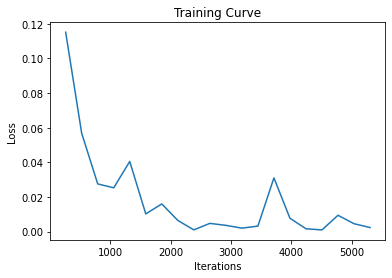

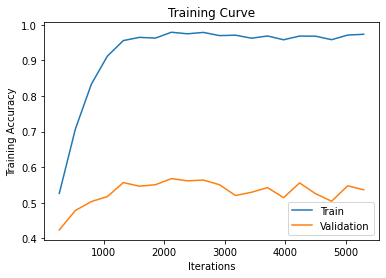

Final Training Accuracy: 0.9735599622285175
Final Validation Accuracy: 0.5367573011077543
total time: 347.2828719615936 seconds


([0.5265580736543909,
  0.7066808309726157,
  0.8332152974504249,
  0.9120632672332389,
  0.9558545797922569,
  0.9648253068932956,
  0.9628186968838527,
  0.9792256846081209,
  0.9748583569405099,
  0.9787535410764873,
  0.9697828139754485,
  0.9709631728045326,
  0.9624645892351275,
  0.9687204910292729,
  0.9580972615675165,
  0.9684844192634561,
  0.9681303116147308,
  0.9583333333333334,
  0.9711992445703493,
  0.9735599622285175],
 [0.42396777442094663,
  0.4783484390735146,
  0.5035246727089627,
  0.5176233635448136,
  0.5568982880161127,
  0.5468277945619335,
  0.5508559919436052,
  0.56797583081571,
  0.5619335347432024,
  0.5639476334340383,
  0.5508559919436052,
  0.5206445115810675,
  0.5297079556898288,
  0.5427995971802618,
  0.5146022155085599,
  0.5558912386706949,
  0.525679758308157,
  0.5045317220543807,
  0.5478348439073515,
  0.5367573011077543])

In [ ]:
# 1st dataset
use_cuda = True

alexmodel = AlexNet()



if use_cuda and torch.cuda.is_available():
  alexmodel.cuda()

  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_netALEX(alexmodel, train_feature_loader, val_feature_loader, batch_size=25, learning_rate=0.001, num_epochs=20)

CUDA is not available.  Training on CPU ...
Training Started...
0 0.7362270450751253 0.616260162601626
1 0.9183824893340753 0.697560975609756
2 0.9671675013912076 0.7284552845528456
3 0.9870153960304211 0.7317073170731707
4 0.9912817659061398 0.759349593495935
5 0.9970320905212391 0.7658536585365854
6 0.9972175848636616 0.7642276422764228
7 0.9979595622333519 0.7902439024390244
8 0.996661101836394 0.7528455284552845
9 0.9582637729549248 0.6666666666666666
10 0.9246892969764422 0.6341463414634146
11 0.9814505657577444 0.7300813008130081
12 0.994991652754591 0.7154471544715447
13 0.9872008903728436 0.7056910569105691
14 0.9927657206455203 0.71869918699187
15 0.9977740678909294 0.759349593495935
16 0.9987015396030421 0.7447154471544716
17 0.9992580226303098 0.7642276422764228
18 0.9970320905212391 0.7528455284552845


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


output:  tensor([69]) with a probability of tensor([0.9999], grad_fn=<SelectBackward>)
output:  tensor([43]) with a probability of tensor([1.0000], grad_fn=<SelectBackward>)
output:  tensor([146]) with a probability of tensor([0.4250], grad_fn=<SelectBackward>)
output:  tensor([130]) with a probability of tensor([0.9891], grad_fn=<SelectBackward>)
output:  tensor([26]) with a probability of tensor([0.9955], grad_fn=<SelectBackward>)
output:  tensor([111]) with a probability of tensor([0.9709], grad_fn=<SelectBackward>)
output:  tensor([5]) with a probability of tensor([0.9999], grad_fn=<SelectBackward>)
output:  tensor([76]) with a probability of tensor([0.9949], grad_fn=<SelectBackward>)
output:  tensor([24]) with a probability of tensor([0.8023], grad_fn=<SelectBackward>)
output:  tensor([3]) with a probability of tensor([0.9983], grad_fn=<SelectBackward>)
output:  tensor([46]) with a probability of tensor([0.9173], grad_fn=<SelectBackward>)
output:  tensor([3]) with a probability of

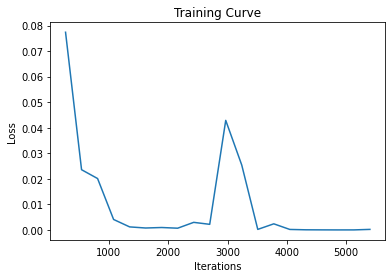

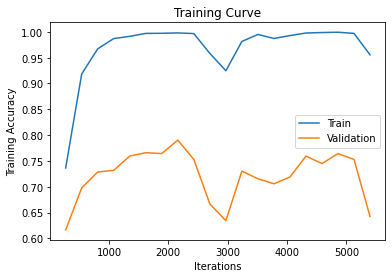

Final Training Accuracy: 0.9554813578185866
Final Validation Accuracy: 0.6422764227642277
total time: 770.6693308353424 seconds


([0.7362270450751253,
  0.9183824893340753,
  0.9671675013912076,
  0.9870153960304211,
  0.9912817659061398,
  0.9970320905212391,
  0.9972175848636616,
  0.9979595622333519,
  0.996661101836394,
  0.9582637729549248,
  0.9246892969764422,
  0.9814505657577444,
  0.994991652754591,
  0.9872008903728436,
  0.9927657206455203,
  0.9977740678909294,
  0.9987015396030421,
  0.9992580226303098,
  0.9970320905212391,
  0.9554813578185866],
 [0.616260162601626,
  0.697560975609756,
  0.7284552845528456,
  0.7317073170731707,
  0.759349593495935,
  0.7658536585365854,
  0.7642276422764228,
  0.7902439024390244,
  0.7528455284552845,
  0.6666666666666666,
  0.6341463414634146,
  0.7300813008130081,
  0.7154471544715447,
  0.7056910569105691,
  0.71869918699187,
  0.759349593495935,
  0.7447154471544716,
  0.7642276422764228,
  0.7528455284552845,
  0.6422764227642277])

In [ ]:
# 2nd dataset
use_cuda = True

alexmodel = AlexNet()



if use_cuda and torch.cuda.is_available():
  alexmodel.cuda()

  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train_netALEX(alexmodel, train_feature_loader, val_feature_loader, batch_size=20, learning_rate=0.001, num_epochs=20)

In [ ]:
batch_size=1
num_workers=1
train_dataset = torchvision.datasets.DatasetFolder(master_path1, loader=torch.load, extensions=('.tensor'))
val_dataset = torchvision.datasets.DatasetFolder(master_path2, loader=torch.load, extensions=('.tensor'))
test_dataset = torchvision.datasets.DatasetFolder(master_path3, loader=torch.load, extensions=('.tensor'))

train_feature_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
val_feature_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_feature_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

In [ ]:
print(len(train_dataset))
print(len(train_feature_loader))

print(train_dataset[0])
#print(train_feature_loader[0])

for imgs, labels in train_feature_loader:
 
    print(imgs)
    break

5391
5391
(tensor([[[0.0000, 2.3232, 2.3232, 0.2618, 0.2618, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.6769, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.9979, 0.0000, 0.0000, 0.0000, 0.5491, 0.2544],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.4985, 0.4749, 0.0000, 0.0000, 0.0000],
         [1.3900, 1.8073, 0.4749, 0.0000, 0.0000, 0.0000],
         [1.3900, 1.8073, 0.3953, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0509, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.2011,

In [ ]:
count1=0
count2=0
imgs_train=[]
labels_train=[]
count=0
for imgs, labels in train_feature_loader:
 
  imgs_train.append(imgs.flatten().detach().numpy())
  labels_train.append(labels.numpy())
  # count1+=1
  # print(count1)
  # if count1==100:
  #   break

print('done1')
imgs_test = []
labels_test = []
count = 0

for imgs, labels in test_feature_loader:
  imgs_test.append(imgs.flatten().detach().numpy())
  labels_test.append(labels.numpy())
  # count2+=1
  # if count2==20:
  #   break

print(len(imgs_train))
print(len(labels_train))
print(len(imgs_test))
print(len(labels_test))

done1
5391
5391
814
814


In [ ]:
imgs_train_array = np.array(imgs_train)
#print(imgs_train_array)
print(imgs_train_array.shape)

labels_train_array = np.array(labels_train)
#print(labels_train_array)
print(labels_train_array.shape)
print(np.amax(labels_train_array))
print(np.amin(labels_train_array))

imgs_test_array = np.array(imgs_test)

labels_test_array = np.array(labels_test)

(5391, 9216)
(5391, 1)
149
0


In [ ]:
from sklearn import svm
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import scikitplot as skplt
import matplotlib.pyplot as plt

# Learn to predict each class against the other
classifier = svm.SVC(kernel='linear', probability=True)
print('done1')
svm_model_fitted = classifier.fit(imgs_train_array, labels_train_array)

print('done2')

labels_score = svm_model_fitted.decision_function(imgs_test_array)
print(labels_score.shape)
print('done3')

predicted_values = svm_model_fitted.predict(imgs_test_array)
print(predicted_values.shape)
print(labels_test_array.shape)
print('done4')

print("The baseline model's accuracy:", metrics.accuracy_score(labels_test_array, predicted_values))
print('done2')

done1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


done2
(814, 150)
done3
(814,)
(814, 1)
done4
The baseline model's accuracy: 0.8132678132678133
done2


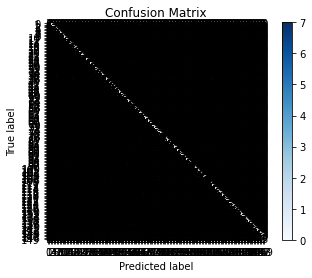

In [ ]:
skplt.metrics.plot_confusion_matrix(y_true=labels_test_array, y_pred=predicted_values)
plt.show()

In [ ]:
print(predicted_values[:820].shape)
print(labels_test_array[:10].shape)

(814,)
(10, 1)


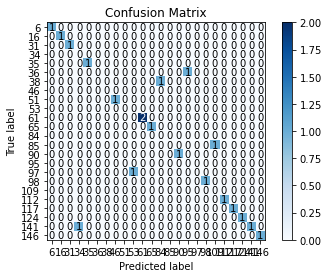

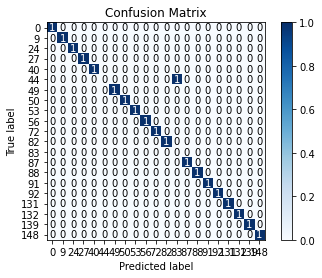

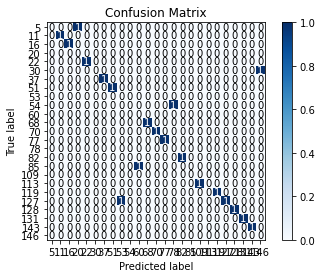

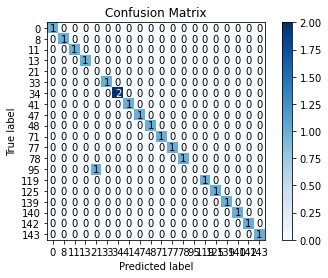

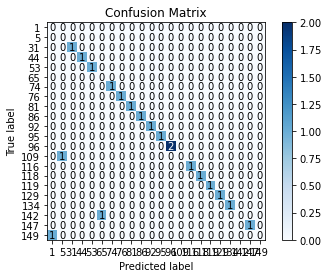

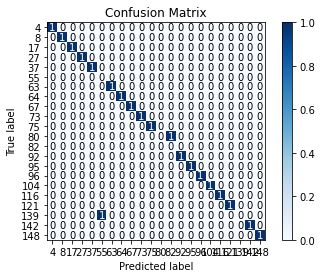

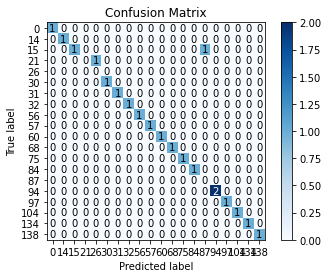

In [ ]:

idx1=0
idx2=20
while idx1<140:
  skplt.metrics.plot_confusion_matrix(y_true=labels_test_array[idx1:idx2], y_pred=predicted_values[idx1:idx2],normalize=0)
  plt.show()
  idx1+=20
  idx2+=20

ValueError: ignored

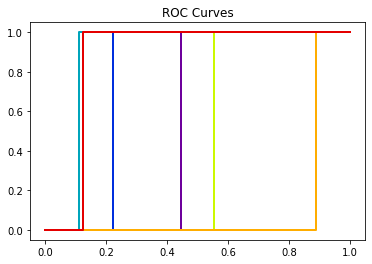

In [ ]:
label_test_probas = svm_model_fitted.predict_proba(imgs_test_array)
skplt.metrics.plot_roc(labels_test_array[:10], label_test_probas[:10])
plt.show()

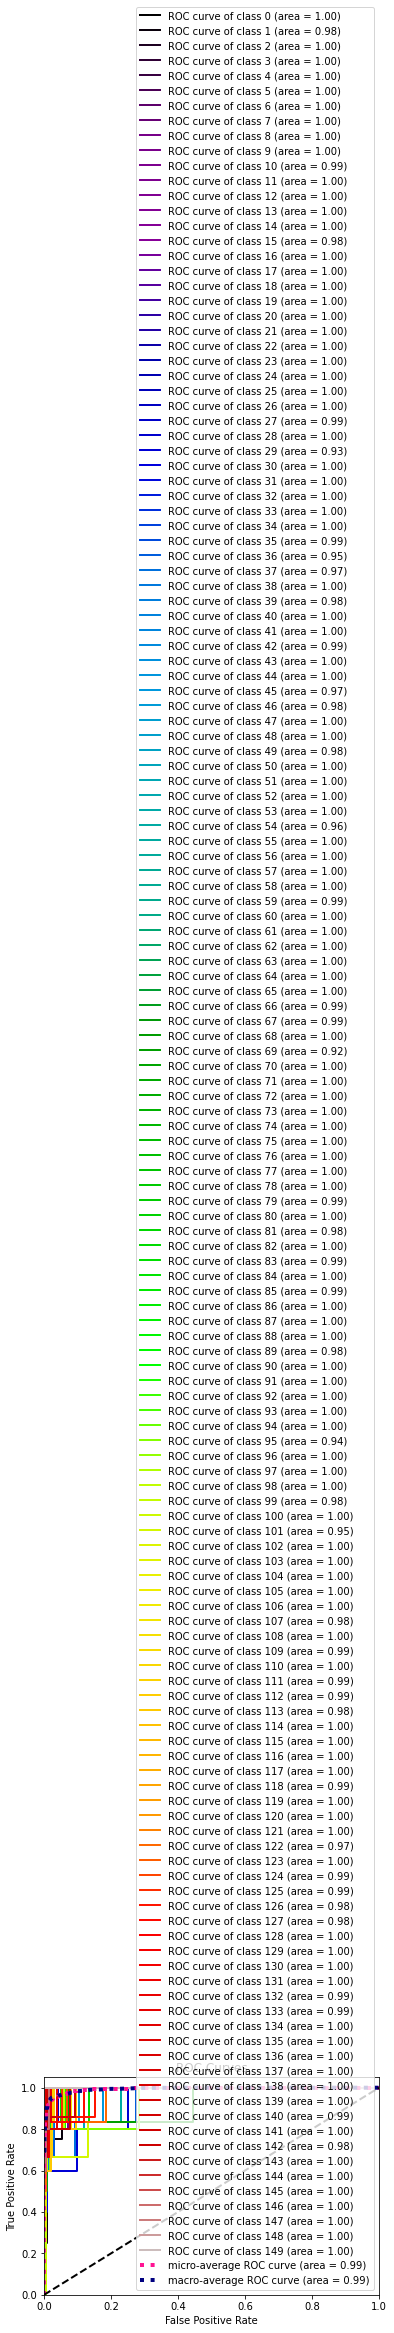

In [ ]:
label_test_probas = svm_model_fitted.predict_proba(imgs_test_array)
skplt.metrics.plot_roc(labels_test_array, label_test_probas)
plt.show()

In [ ]:
# sample of 10
# Train a linear SVM classifier: 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', probability=True, C = 1).fit(imgs_train, labels_train) 
svm_predictions = svm_model_linear.predict(imgs_test) 
  
# Model accuracy for imgs_test: 
accuracy = svm_model_linear.score(imgs_test, labels_test) 
print("Model accuracy is: " , accuracy)

# # Create a confusion matrix: 
# cm = confusion_matrix(labels_test, svm_predictions)
# print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy is:  0.9027777777777778


[0.         0.         0.         0.03030303 0.03030303 1.        ]
[0.         0.16666667 0.83333333 0.83333333 1.         1.        ]


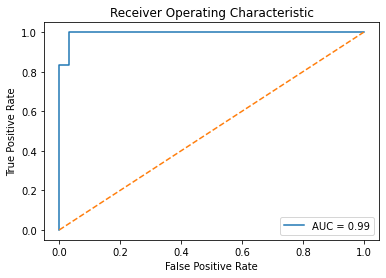

In [ ]:
from sklearn.metrics import roc_curve, auc
# predict probabilities for X_test using predict_proba
probabilities = svm_model_linear.predict_proba(imgs_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_proba, pos_label=1)

print(false_positive_rate)
print(true_positive_rate)
# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
# new data sample
# Train a linear SVM classifier: 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', probability=True, C = 1).fit(imgs_train, labels_train) 
svm_predictions = svm_model_linear.predict(imgs_test) 
  
# Model accuracy for imgs_test: 
accuracy = svm_model_linear.score(imgs_test, labels_test) 
print("Model accuracy is: " , accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy is:  0.8132678132678133


In [ ]:
print(len(imgs_train[12]))
print(len(labels_train))

9216
5391


[0.         0.         0.00617284 0.00617284 0.00740741 0.00740741
 0.04938272 0.04938272 1.        ]
[0.   0.25 0.25 0.5  0.5  0.75 0.75 1.   1.  ]


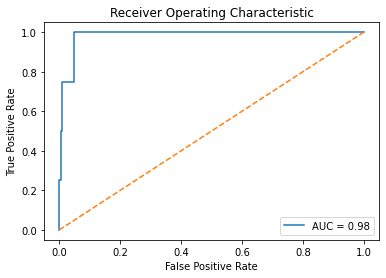

In [ ]:
from sklearn.metrics import roc_curve, auc
# predict probabilities for X_test using predict_proba
probabilities = svm_model_linear.predict_proba(imgs_test)

# select the probabilities for label 1.0
y_proba = probabilities[:, 1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(labels_test, y_proba, pos_label=1)

print(false_positive_rate)
print(true_positive_rate)
# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download --unzip thedagger/pokemon-generation-one 
! rm dataset/dataset/ -rf

 99% 2.14G/2.15G [01:18<00:00, 28.5MB/s]
100% 2.15G/2.15G [01:18<00:00, 29.6MB/s]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import numpy as np
import time

torch.manual_seed(1) # set the random seed

# obtain data
from torchvision import datasets, transforms

In [ ]:
def get_data_loader(batch_size):
    """ Loads images of cats and dogs, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('A', 'B', 'C', 'D',
               'E', 'F', 'G', 'H', 'I')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.Resize((224,224)), 
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load training data
    train_path = 'dataset/'
    datas = datasets.ImageFolder(train_path,transform)
    # Get the list of indices to sample from
    relevant_indices = []
    for i in range(len(datas)): relevant_indices.append(i)
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.9) #split at 90%
    split1 = int(len(relevant_indices) * 0.99) #split at 99%
    
    # split into training, validation and testing indices
    relevant_train_indices, relevant_val_indices, relevant_test_indices = relevant_indices[:split], relevant_indices[split:split1], relevant_indices[split1:]  
  
    
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(datas, batch_size=batch_size,
                                              num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(datas, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(datas, batch_size=batch_size,
                                              num_workers=1, sampler=test_sampler)

    return train_loader, val_loader, test_loader

In [ ]:
train_loader, val_loader, test_loader = get_data_loader(20)
for i, data in enumerate(train_loader, 0):
  imgs,labels = data
  print(i,imgs.shape,labels)
  if i==3: break

for i, data in enumerate(val_loader, 0):
  imgs,labels = data
  print(i,imgs.shape,labels)
  if i==3: break

for i, data in enumerate(test_loader, 0):
  imgs,labels = data
  print(i,imgs.shape,labels)
  if i==3: break  

0 torch.Size([20, 3, 224, 224]) tensor([ 58,  14,  31,  82,  55, 122, 113, 121, 111,  12,  61, 130,  34,  54,
         85,  58,  14,  59, 133, 102])
1 torch.Size([20, 3, 224, 224]) tensor([147,  40,   4,  40,   9, 100,  47,  82,  38, 134,  59, 101,   2,  72,
         38, 126,  57, 100,  67,   0])
2 torch.Size([20, 3, 224, 224]) tensor([101,  11, 125, 116, 126,  38,  27,   9,  48, 127, 123,  82,  98,  65,
         27,  82,  82, 136,   9,  60])
3 torch.Size([20, 3, 224, 224]) tensor([116, 101,  40,  46, 121, 109, 128, 147,  15, 100, 101, 135,  34, 134,
         91, 127,  64,  37,  20,  12])
0 torch.Size([20, 3, 224, 224]) tensor([ 53, 141, 112,  72,  59,  78,  15,  56,  15,   1, 101, 101,  54,  70,
         47,  69,   8, 128,  63,  15])
1 torch.Size([20, 3, 224, 224]) tensor([ 74,  39,  84,  63,  88,  81, 109,  49,  82,  37, 123, 130,  83,  77,
         75,  43,  93,  29,  53,  58])
2 torch.Size([20, 3, 224, 224]) tensor([ 21, 123,  74, 142,  37, 127,  37,  47,  36, 114, 101, 143,  77,  

In [ ]:
#Convolutional Neural Network Architecture
class PokemonClassifier2(nn.Module):
    def __init__(self):
        super(PokemonClassifier2, self).__init__()
        self.name = "PokemonClassifier2"
        self.conv1 = nn.Conv2d(3, 5, 6) #in_channels, out_chanels, kernel_size
        self.pool1 = nn.MaxPool2d(2, 2) #kernel_size, stride 
        self.conv2 = nn.Conv2d(5, 9, 10) #in_channels, out_chanels, kernel_size
        self.conv3=nn.Conv2d(9,12,12)
        self.fc1 = nn.Linear(4332, 640)
        self.fc2 = nn.Linear(640, 149)
        self.printed = True
        self.count = 0

    def forward(self, x):
        self.count += 1
        # x.squeeze()
        if self.printed: print(x.shape)
        x = self.pool1(F.relu(self.conv1(x)))
        if self.printed: print(x.shape)
        x = self.pool1(F.relu(self.conv2(x)))
        if self.printed: print(x.shape)
        x = self.pool1(F.relu(self.conv3(x)))
        if self.printed: print(x.shape)
        x = x.view(-1, 4332)
        if self.printed: print(x.shape)
        x = F.relu(self.fc1(x))
        if self.printed: print(x.shape)
        x = self.fc2(x)
        if self.printed: print(x.shape)
        self.printed = False
        return x


In [ ]:
def get_accuracy(model, loader):

    correct = 0
    total = 0
    for imgs, labels in loader:
        
    #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
           imgs = imgs.cuda()
           labels = labels.cuda()
    #############################################

        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total


In [ ]:
def train(model, train_loader, val_loader, batch_size=64, num_epochs=1, learning_rate=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    start_time = time.time()    
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):
              
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            
            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
            val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
            n += 1

            if epoch % 10 == 9:
              print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f; Time %f;" % (epoch+1, loss, train_acc[-1], val_acc[-1], time.time()-start_time))

    end_time = time.time()
    elapsed_time = end_time - start_time

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
